In [1]:
!pip install numpy==1.23.5 pandas==1.5.3 bottleneck==1.3.7 pyarrow==11.0.0


  Using cached numpy-1.23.5-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
Using cached numpy-1.23.5-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albucore 0.0.19 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
albumentations 1.4.20 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
paddlepaddle-gpu 2.4.2 requires protobuf<=3.20.0,>=3.1.0, but you have protobuf 5.28.3 which is incompatible.
ultralytics 8.3.4 requires opencv-python>=4.6.0, but you have opencv-python 4.5.5.64 which is incompatible.


In [2]:
import pandas as pd

file_path = "mcc_codes.xlsx"  
try:
    df = pd.read_excel(file_path)
    df_head = df.head()
    print(df_head)
except FileNotFoundError:
    print(f"Файл {file_path} не найден. Убедитесь, что файл существует в указанной директории.")


    MCC                                           Название  \
0   742                                Ветеринарные услуги   
1   763                   Сельскохозяйственные кооперативы   
2   780          Услуги садоводства и ландшафтного дизайна   
3  1520  Генеральные подрядчики – жилое и коммерческое ...   
4  1711  Генеральные подрядчики по вентиляции, теплосна...   

                                            Описание  
0  Лицензированные специалисты в основном занимаю...  
1  Ассоциации и кооперативы, которые предоставляю...  
2  Ландшафтные архитекторы и другие поставщики ус...  
3  Генеральные подрядчики, в основном занимающиес...  
4  Специальные торговые подрядчики, которые работ...  


In [3]:
!pip install stop-words


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from stop_words import get_stop_words
russian_stop_words = get_stop_words("russian")
df['Название'] = df['Название'].fillna("")
df['Описание'] = df['Описание'].fillna("")
df['combined_text'] = df['Название'] + " " + df['Описание']
tfidf_vectorizer = TfidfVectorizer(stop_words=russian_stop_words, max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['combined_text'])



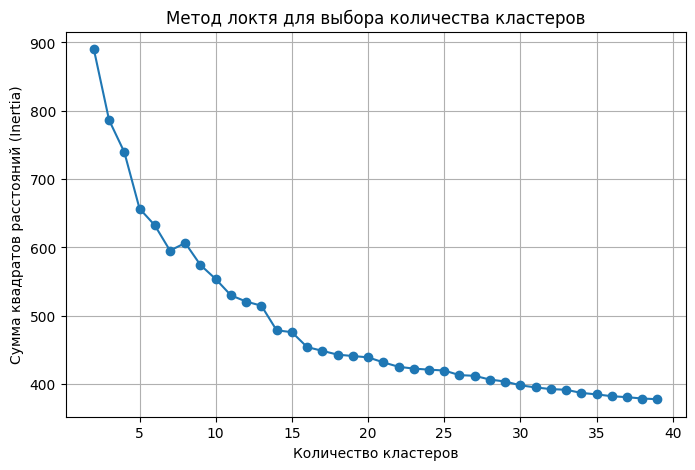

In [5]:
inertia = []
k_values = range(2, 40)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(tfidf_matrix)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Количество кластеров')
plt.ylabel('Сумма квадратов расстояний (Inertia)')
plt.title('Метод локтя для выбора количества кластеров')
plt.grid()
plt.show()


In [6]:

optimal_k = 35  
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(tfidf_matrix)

df[['MCC', 'Название', 'cluster']].head()


,MCC,Название,cluster
0,742,Ветеринарные услуги,2
1,763,Сельскохозяйственные кооперативы,19
2,780,Услуги садоводства и ландшафтного дизайна,19
3,1520,Генеральные подрядчики – жилое и коммерческое ...,2
4,1711,"Генеральные подрядчики по вентиляции, теплосна...",2


/home/dark/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


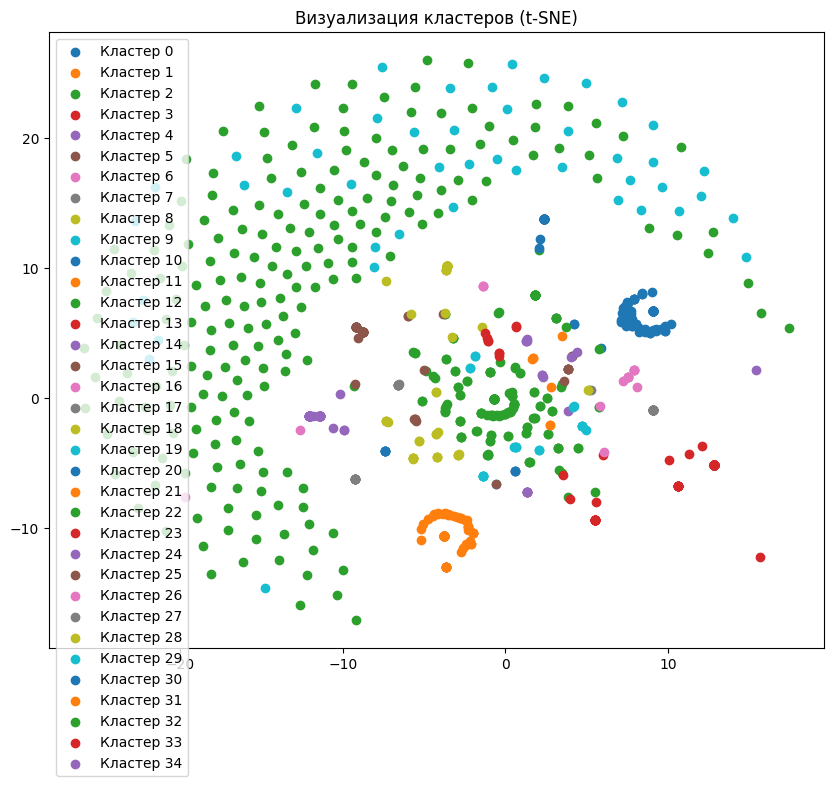

In [7]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300)
tfidf_2d = tsne.fit_transform(tfidf_matrix.toarray())

df['cluster'] = kmeans.labels_

plt.figure(figsize=(10, 8))
for cluster in range(optimal_k):  # optimal_k — количество кластеров
    clustered_points = tfidf_2d[df['cluster'] == cluster]
    plt.scatter(clustered_points[:, 0], clustered_points[:, 1], label=f'Кластер {cluster}')
plt.title('Визуализация кластеров (t-SNE)')
plt.legend()
plt.show()


In [8]:

optimal_k = 30  
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(tfidf_matrix)

df[['MCC', 'Название', 'cluster']].head()


,MCC,Название,cluster
0,742,Ветеринарные услуги,2
1,763,Сельскохозяйственные кооперативы,19
2,780,Услуги садоводства и ландшафтного дизайна,19
3,1520,Генеральные подрядчики – жилое и коммерческое ...,2
4,1711,"Генеральные подрядчики по вентиляции, теплосна...",2


/home/dark/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


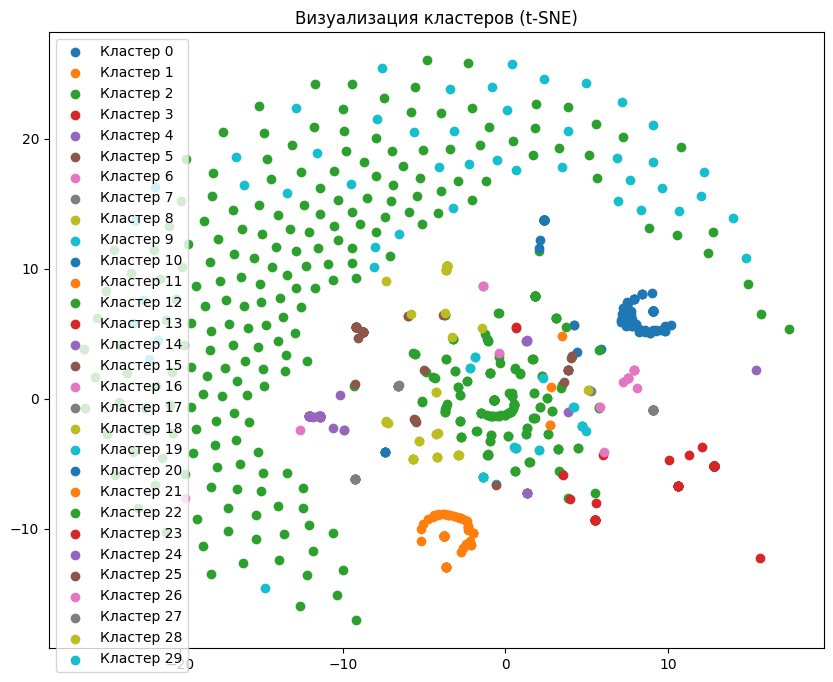

In [9]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300)
tfidf_2d = tsne.fit_transform(tfidf_matrix.toarray())

df['cluster'] = kmeans.labels_

plt.figure(figsize=(10, 8))
for cluster in range(optimal_k):  
    clustered_points = tfidf_2d[df['cluster'] == cluster]
    plt.scatter(clustered_points[:, 0], clustered_points[:, 1], label=f'Кластер {cluster}')
plt.title('Визуализация кластеров (t-SNE)')
plt.legend()
plt.show()


In [10]:
samples_per_cluster = 5  
for cluster in range(optimal_k):  
    print(f"Кластер {cluster}:")
    cluster_samples = df[df['cluster'] == cluster]['combined_text'].head(samples_per_cluster)
    for i, sample in enumerate(cluster_samples, 1):
        print(f"{i}. {sample}")
    print("\n" + "-" * 50 + "\n")


Кластер 0:
1. Best Western Hotels 
2. Sheraton Hotels 
3. Marriott Hotels 
4. Arabella Hotels 
5. Westin Hotels 

--------------------------------------------------

Кластер 1:
1. Отели, мотели, курорты 
2. Отели, мотели, курорты 
3. Отели, мотели, курорты 
4. Отели, мотели, курорты 
5. Отели, мотели, курорты 

--------------------------------------------------

Кластер 2:
1. Ветеринарные услуги Лицензированные специалисты в основном занимающиеся практикой ветеринарии, стоматологии или хирургии для всех видов животных; таких как домашние животные (например, собаки, кошки, рыба), домашний скот и другие фермерские животные (например, рогатый скот, лошади, овцы, свиньи, козы, домашние птицы, пчелы) и экзотические животные.
2. Генеральные подрядчики – жилое и коммерческое строительство Генеральные подрядчики, в основном занимающиеся строительством жилых и коммерческих зданий. Строительные услуги могут включать новое строительство, реконструкцию, ремонт, дополнения и изменения.
3. Генеральн

In [11]:
!pip install sentence_transformers tensorflow


  Using cached tensorflow-2.18.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.1 kB)
  Using cached keras-3.6.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached numpy-2.0.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached numpy-1.26.4-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached tensorflow-2.18.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (615.3 MB)
Using cached keras-3.6.0-py3-none-any.whl (1.2 MB)
Using cached numpy-1.26.4-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have nump

In [12]:
!pip install tf_keras

In [13]:
!pip install torch torchvision


In [14]:
!pip uninstall tensorflow keras  -y

Found existing installation: tensorflow 2.18.0
Uninstalling tensorflow-2.18.0:
  Successfully uninstalled tensorflow-2.18.0
Found existing installation: keras 3.6.0
Uninstalling keras-3.6.0:
  Successfully uninstalled keras-3.6.0


Loading model and tokenizer...
Preprocessing text...
Encoding text...
Clustering...
Performing t-SNE...


/home/dark/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Visualizing clusters...


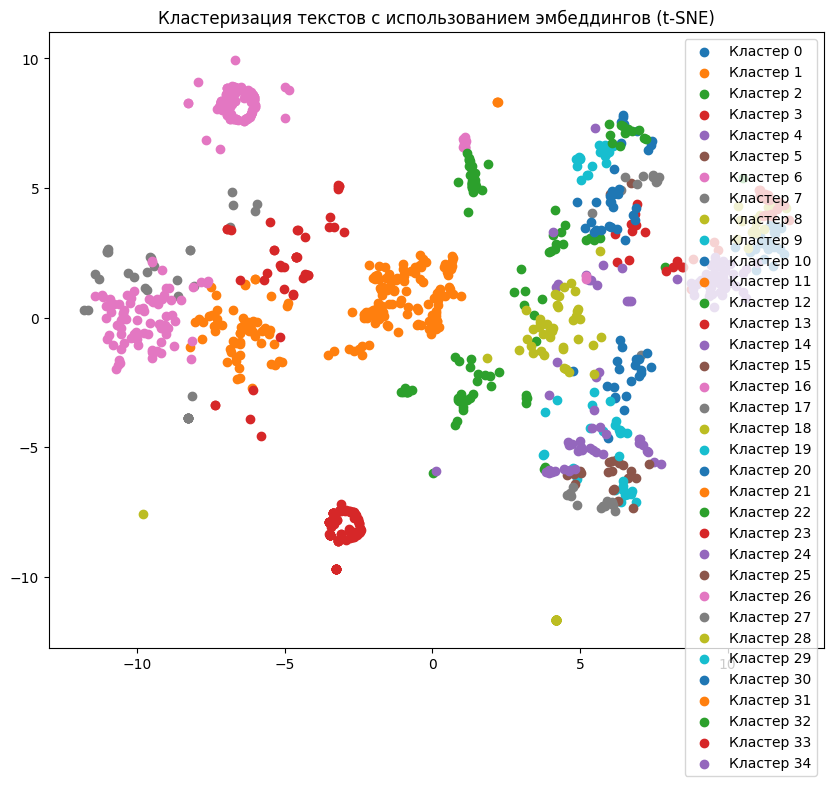

Кластер 0:
1. Sheraton Hotels 
2. Marriott Hotels 
3. Westin Hotels 
4. Pullman International Hotels 
5. Red Lion Hotels 

--------------------------------------------------

Кластер 1:
1. Сельскохозяйственные кооперативы Ассоциации и кооперативы, которые предоставляют услуги управления фермами или оказывают помощь в сельскохозяйственных операциях. Примерами таких услуг являются финансовая помощь, управление или полное содержание сельскохозяйственных культур, подготовка почвы, посадка и культивация, аэрофотосжигание и распыление, борьба с болезнями и насекомыми, борьба с сорняками и сбор урожая.
Для точек, которые предоставляют складские помещения и хранилища ферм, используется MCC 4225.
2. Генеральные подрядчики по вентиляции, теплоснабжению и водопроводу Специальные торговые подрядчики, которые работают с системами отопления, водопровода и вентиляции. Примерами их услуг являются: балансировка и испытания вентиляционных системы, установка дренажной системы, ремонт отопления, установка

In [15]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from transformers import AutoTokenizer, AutoModel
import torch
import pandas as pd

print("Loading model and tokenizer...")
model_name = "bert-base-multilingual-cased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

print("Preprocessing text...")
df['combined_text'] = df['combined_text'].fillna("")
texts = df['combined_text'].tolist()

print("Encoding text...")
def encode_texts(texts, tokenizer, model, device):
    embeddings = []
    for text in texts:
        inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=128)
        inputs = {key: value.to(device) for key, value in inputs.items()}
        with torch.no_grad():
            outputs = model(**inputs)
        cls_embedding = outputs.last_hidden_state[:, 0, :]
        embeddings.append(cls_embedding.cpu().numpy())
    return torch.cat([torch.tensor(embedding) for embedding in embeddings]).numpy()

embeddings = encode_texts(texts, tokenizer, model, device)

print("Clustering...")
optimal_k = 35
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(embeddings)

print("Performing t-SNE...")
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300)
tsne_embeddings = tsne.fit_transform(embeddings)

print("Visualizing clusters...")
plt.figure(figsize=(10, 8))
for cluster in range(optimal_k):
    cluster_points = tsne_embeddings[df['cluster'] == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Кластер {cluster}')
plt.title('Кластеризация текстов с использованием эмбеддингов (t-SNE)')
plt.legend()
plt.show()

samples_per_cluster = 5
for cluster in range(optimal_k):
    print(f"Кластер {cluster}:")
    cluster_samples = df[df['cluster'] == cluster]['combined_text'].head(samples_per_cluster)
    for i, sample in enumerate(cluster_samples, 1):
        print(f"{i}. {sample}")
    print("\n" + "-" * 50 + "\n")


In [16]:
!pip install transformers scikit-learn hnswlib matplotlib torch pandas scipy


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Loading model and tokenizer...
Preprocessing text...
Encoding text...
Building HNSW index and clustering...
Performing t-SNE...


/home/dark/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Visualizing clusters...


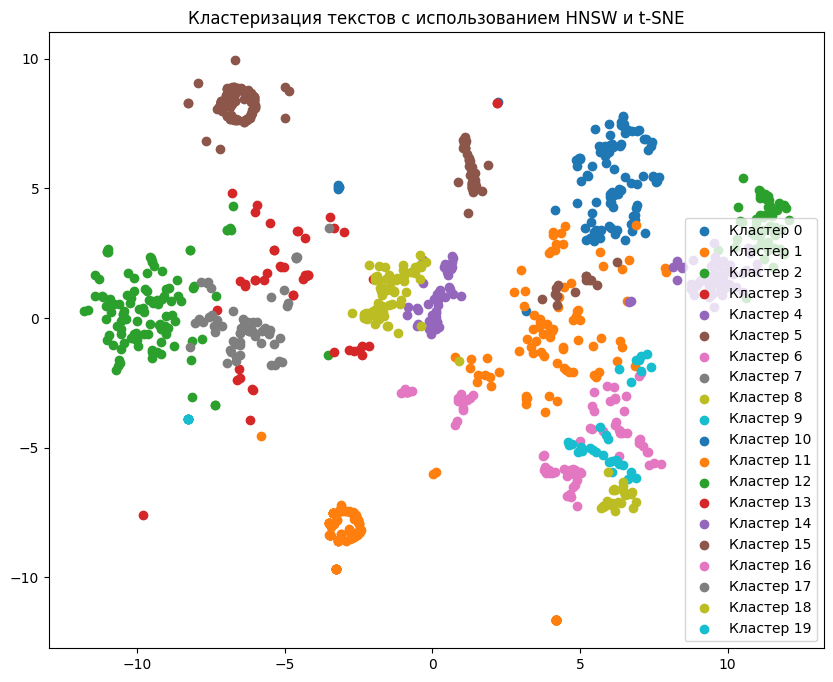

Кластер 0:
1. El Al 
2. Windward Island 
3. Holiday Inns 
4. Friendship Inns 
5. Days Inn 

--------------------------------------------------

Кластер 1:
1. Dragonair 
2. Аэрофлот 
3. Qantas 
4. Alitalia 
5. Scandinavian Airline System 

--------------------------------------------------

Кластер 2:
1. Ветеринарные услуги Лицензированные специалисты в основном занимающиеся практикой ветеринарии, стоматологии или хирургии для всех видов животных; таких как домашние животные (например, собаки, кошки, рыба), домашний скот и другие фермерские животные (например, рогатый скот, лошади, овцы, свиньи, козы, домашние птицы, пчелы) и экзотические животные.
2. Услуги садоводства и ландшафтного дизайна Ландшафтные архитекторы и другие поставщики услуг по ландшафтному планированию и дизайну. Кроме того, точки, которые предлагают различные услуги по уходу за газоном и садом, такие как посадка, удобрение, выкос, мульчирование, посев, опрыскивание и укладка дерна.
3. Генеральные подрядчики – жилое и 

In [19]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from transformers import AutoTokenizer, AutoModel
import hnswlib
import numpy as np
import pandas as pd
import torch

print("Loading model and tokenizer...")
model_name = "bert-base-multilingual-cased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

print("Preprocessing text...")
df['combined_text'] = df['combined_text'].fillna("")
texts = df['combined_text'].tolist()

print("Encoding text...")
def encode_texts(texts, tokenizer, model, device):
    embeddings = []
    for text in texts:
        inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=128)
        inputs = {key: value.to(device) for key, value in inputs.items()}
        with torch.no_grad():
            outputs = model(**inputs)
        cls_embedding = outputs.last_hidden_state[:, 0, :]
        embeddings.append(cls_embedding.cpu().numpy())
    return np.vstack(embeddings)

embeddings = encode_texts(texts, tokenizer, model, device)

print("Building HNSW index and clustering...")
dim = embeddings.shape[1]
num_elements = embeddings.shape[0]

hnsw_index = hnswlib.Index(space='cosine', dim=dim)
hnsw_index.init_index(max_elements=num_elements, ef_construction=200, M=16)

hnsw_index.add_items(embeddings)

ef_search = 50 
hnsw_index.set_ef(ef_search)

from sklearn.cluster import AgglomerativeClustering

k = 5
neighbors, _ = hnsw_index.knn_query(embeddings, k=k)

from scipy.sparse import csr_matrix

rows, cols = np.repeat(np.arange(num_elements), k), neighbors.flatten()
data = np.ones(len(rows))
adjacency_matrix = csr_matrix((data, (rows, cols)), shape=(num_elements, num_elements))

cluster_model = AgglomerativeClustering(n_clusters=20, metric='cosine', linkage='average')
df['cluster'] = cluster_model.fit_predict(adjacency_matrix.toarray())

print("Performing t-SNE...")
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300)
tsne_embeddings = tsne.fit_transform(embeddings)

print("Visualizing clusters...")
plt.figure(figsize=(10, 8))
for cluster in np.unique(df['cluster']):
    cluster_points = tsne_embeddings[df['cluster'] == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Кластер {cluster}')
plt.title('Кластеризация текстов с использованием HNSW и t-SNE')
plt.legend()
plt.show()

samples_per_cluster = 5
for cluster in np.unique(df['cluster']):
    print(f"Кластер {cluster}:")
    cluster_samples = df[df['cluster'] == cluster]['combined_text'].head(samples_per_cluster)
    for i, sample in enumerate(cluster_samples, 1):
        print(f"{i}. {sample}")
    print("\n" + "-" * 50 + "\n")
